# Diamond XRD

In [1]:
import numpy as np
import math
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
wavelength = 0.1542 #nm
lattice_constant = 0.356 #nm

In [3]:
# Read in the miller indices csv:
planes_df = pd.read_csv('All_Planes_hkl.csv')
miller_indices = planes_df.values
# Store this in a dataframe:
miller_list = [list(row) for row in miller_indices[0:20]]
df = pd.DataFrame({'Miller': miller_list})

In [4]:
df['hkl_squared'] = df['Miller'].apply(lambda x: x[0]**2 + x[1]**2 + x[2]**2)
df['sin theta (rad)'] = df['hkl_squared'].apply(lambda x: math.sqrt((wavelength**2/(4*lattice_constant**2))*x))
df['theta (rad)'] = df['sin theta (rad)'].apply(lambda x:(math.asin(x)))
df['theta (deg)'] = df['theta (rad)'].apply(lambda x: np.rad2deg(x))
df['2 theta (deg)'] = df['theta (deg)'].apply(lambda x: 2 * x)

In [5]:
df

,Miller,hkl_squared,sin theta (rad),theta (rad),theta (deg),2 theta (deg)
0,"[1, 0, 0]",1,0.216573,0.218303,12.507830,25.015660
1,"[1, 1, 0]",2,0.306281,0.311283,17.835220,35.670439
2,"[1, 1, 1]",3,0.375115,0.384521,22.031451,44.062903
3,"[2, 0, 0]",4,0.433146,0.447980,25.667384,51.334768
4,"[2, 1, 0]",5,0.484272,0.505531,28.964789,57.929577
5,"[2, 1, 1]",6,0.530493,0.559183,32.038800,64.077599
6,"[2, 2, 0]",8,0.612561,0.659297,37.774914,75.549829
7,"[2, 2, 1]",9,0.649719,0.707215,40.520427,81.040853
8,"[3, 0, 0]",9,0.649719,0.707215,40.520427,81.040853
9,"[3, 1, 0]",10,0.684864,0.754417,43.224918,86.449835


In [6]:
# Define atom positons in cubic cell:
C_positions = np.array([[0, 0, 0], [0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5], [0.25, 0.25, 0.25], [0.75, 0.75, 0.25], [0.75, 0.25, 0.75], [0.25, 0.75, 0.75]])

In [7]:
def compute_structure_factor_term_i(atom_positions, miller_indices_array):
    results = {}
    
    for miller_indices in miller_indices_array:
        h, k, l = miller_indices
        total = 0
        
        for position in atom_positions:
            #position_adjusted = 2*position # distribute the 2 in the exponential factor to each atom position
            x, y, z = position
            value = x * h + y * k + z * l
            term = np.round(np.exp(2j*np.pi*value), 2)
            total += term
        
        # Store the result with Miller indices as the key
        results[tuple(miller_indices)] = total
    
    return results

In [8]:
Cu_structure_factor_term = compute_structure_factor_term_i(C_positions, miller_indices)
print("Cu", Cu_structure_factor_term)

Cu {(1, 0, 0): 0j, (1, 1, 0): 0j, (1, 1, 1): (4-4j), (2, 0, 0): 0j, (2, 1, 0): 0j, (2, 1, 1): 0j, (2, 2, 0): (8+0j), (2, 2, 1): 0j, (3, 0, 0): 0j, (3, 1, 0): 0j, (3, 1, 1): (4+4j), (2, 2, 2): 0j, (3, 2, 0): 0j, (3, 2, 1): 0j, (4, 0, 0): (8+0j), (3, 2, 2): 0j, (4, 1, 0): 0j, (3, 3, 0): 0j, (4, 1, 1): 0j, (3, 3, 1): (4-4j), (4, 2, 0): 0j, (4, 2, 1): 0j, (3, 3, 2): 0j, (4, 2, 2): (8+0j), (5, 0, 0): 0j, (4, 3, 1): 0j, (5, 1, 0): 0j, (3, 3, 3): (4+4j), (5, 1, 1): (4-4j), (4, 3, 2): 0j, (5, 2, 0): 0j, (5, 2, 1): 0j, (4, 4, 0): (8+0j), (4, 4, 1): 0j, (5, 2, 2): 0j, (4, 3, 3): 0j, (5, 3, 0): 0j, (5, 3, 1): (4+4j), (4, 4, 2): 0j, (6, 0, 0): 0j, (6, 1, 0): 0j, (5, 2, 3): 0j, (6, 2, 0): (8+0j), (4, 4, 3): 0j, (5, 4, 0): 0j, (5, 4, 1): 0j, (5, 2, 4): 0j, (4, 4, 4): (8+0j)}


In [9]:
# This calculates f, the atomic scattering factor, for each atom time at each theta angle 
# check the angle calculation units
def calc_atomic_scattering_factor(theta, atomic_number, a1, b1, a2, b2, a3, b3, a4=None, b4=None, wavelength = 0.1542):
    s = math.sin(theta)/(wavelength*10)
    f = atomic_number - (41.78214 * s**2) * (a1*np.e**(-b1*s**2) + a2*np.e**(-b2*s**2) + a3*np.e**(-b3*s**2) + a4*np.e**(-b4*s**2))
    return f

In [10]:
# Define function to calculate multiplicity facor for each plane:
def get_unique_permutations(hkl):
    # Get all permutations of the Miller indices
    perms = list(itertools.permutations(hkl))
    
    # For each permutation, consider all possible sign changes
    all_permutations = []
    for perm in perms:
        signs = itertools.product([1, -1], repeat=3)
        for sign in signs:
            all_permutations.append(tuple([i*j for i, j in zip(perm, sign)]))
    
    # Return unique permutations (planes)
    return set(all_permutations)

In [11]:
# Calculate the structure factors using the atomic scattering factors- 
# i need to go through this math to make sure it is correct- 
# it definitely doesnt match the peak intensities given on mateirals project
df['Cu_f'] = df['theta (rad)'].apply(lambda x: calc_atomic_scattering_factor(x, 6, 0.731, 36.995, 1.195, 11.297, 0.456, 2.814, 0.125, 0.346))
df['Structure Factor'] = df['Cu_f'] * df['Miller'].apply(lambda x: Cu_structure_factor_term[tuple(x)])
df['conj'] = df['Structure Factor'].apply(lambda x: np.conj(x))
result = (df["Structure Factor"]*df['conj'])
df['F^2'] = result.apply(lambda x: x.real)
df['p'] = df['Miller'].apply(lambda x: len(get_unique_permutations(x)))
df['Lorentz_factor'] = df['theta (rad)'].apply(lambda x: (1+(math.cos(2*x)**2)) / (math.sin(x)**2 * math.cos(x)))
df['Intensity'] = df['F^2']*df['p']*df['Lorentz_factor']
df["Intensity_norm"] = (df["Intensity"]/df["Intensity"].max())*100


In [12]:
df

,Miller,hkl_squared,sin theta (rad),theta (rad),theta (deg),2 theta (deg),Cu_f,Structure Factor,conj,F^2,p,Lorentz_factor,Intensity,Intensity_norm
0,"[1, 0, 0]",1,0.216573,0.218303,12.507830,25.015660,4.463557,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,6,39.771943,0.000000,0.000000
1,"[1, 1, 0]",2,0.306281,0.311283,17.835220,35.670439,3.582647,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,12,18.588782,0.000000,0.000000
2,"[1, 1, 1]",3,0.375115,0.384521,22.031451,44.062903,3.026037,12.104148-12.104148j,12.104148+12.104148j,293.020774,8,11.625207,27251.417231,100.000000
3,"[2, 0, 0]",4,0.433146,0.447980,25.667384,51.334768,2.649289,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,6,8.221864,0.000000,0.000000
4,"[2, 1, 0]",5,0.484272,0.505531,28.964789,57.929577,2.383943,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,24,6.247626,0.000000,0.000000
5,"[2, 1, 1]",6,0.530493,0.559183,32.038800,64.077599,2.193171,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,24,4.992899,0.000000,0.000000
6,"[2, 2, 0]",8,0.612561,0.659297,37.774914,75.549829,1.951930,15.615437+0.000000j,15.615437-0.000000j,243.841859,12,3.581592,10480.104574,38.457099
7,"[2, 2, 1]",9,0.649719,0.707215,40.520427,81.040853,1.875018,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,24,3.191849,0.000000,0.000000
8,"[3, 0, 0]",9,0.649719,0.707215,40.520427,81.040853,1.875018,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,6,3.191849,0.000000,0.000000
9,"[3, 1, 0]",10,0.684864,0.754417,43.224918,86.449835,1.815581,0.0000000+0.0000000j,0.0000000-0.0000000j,0.000000,24,2.937121,0.000000,0.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

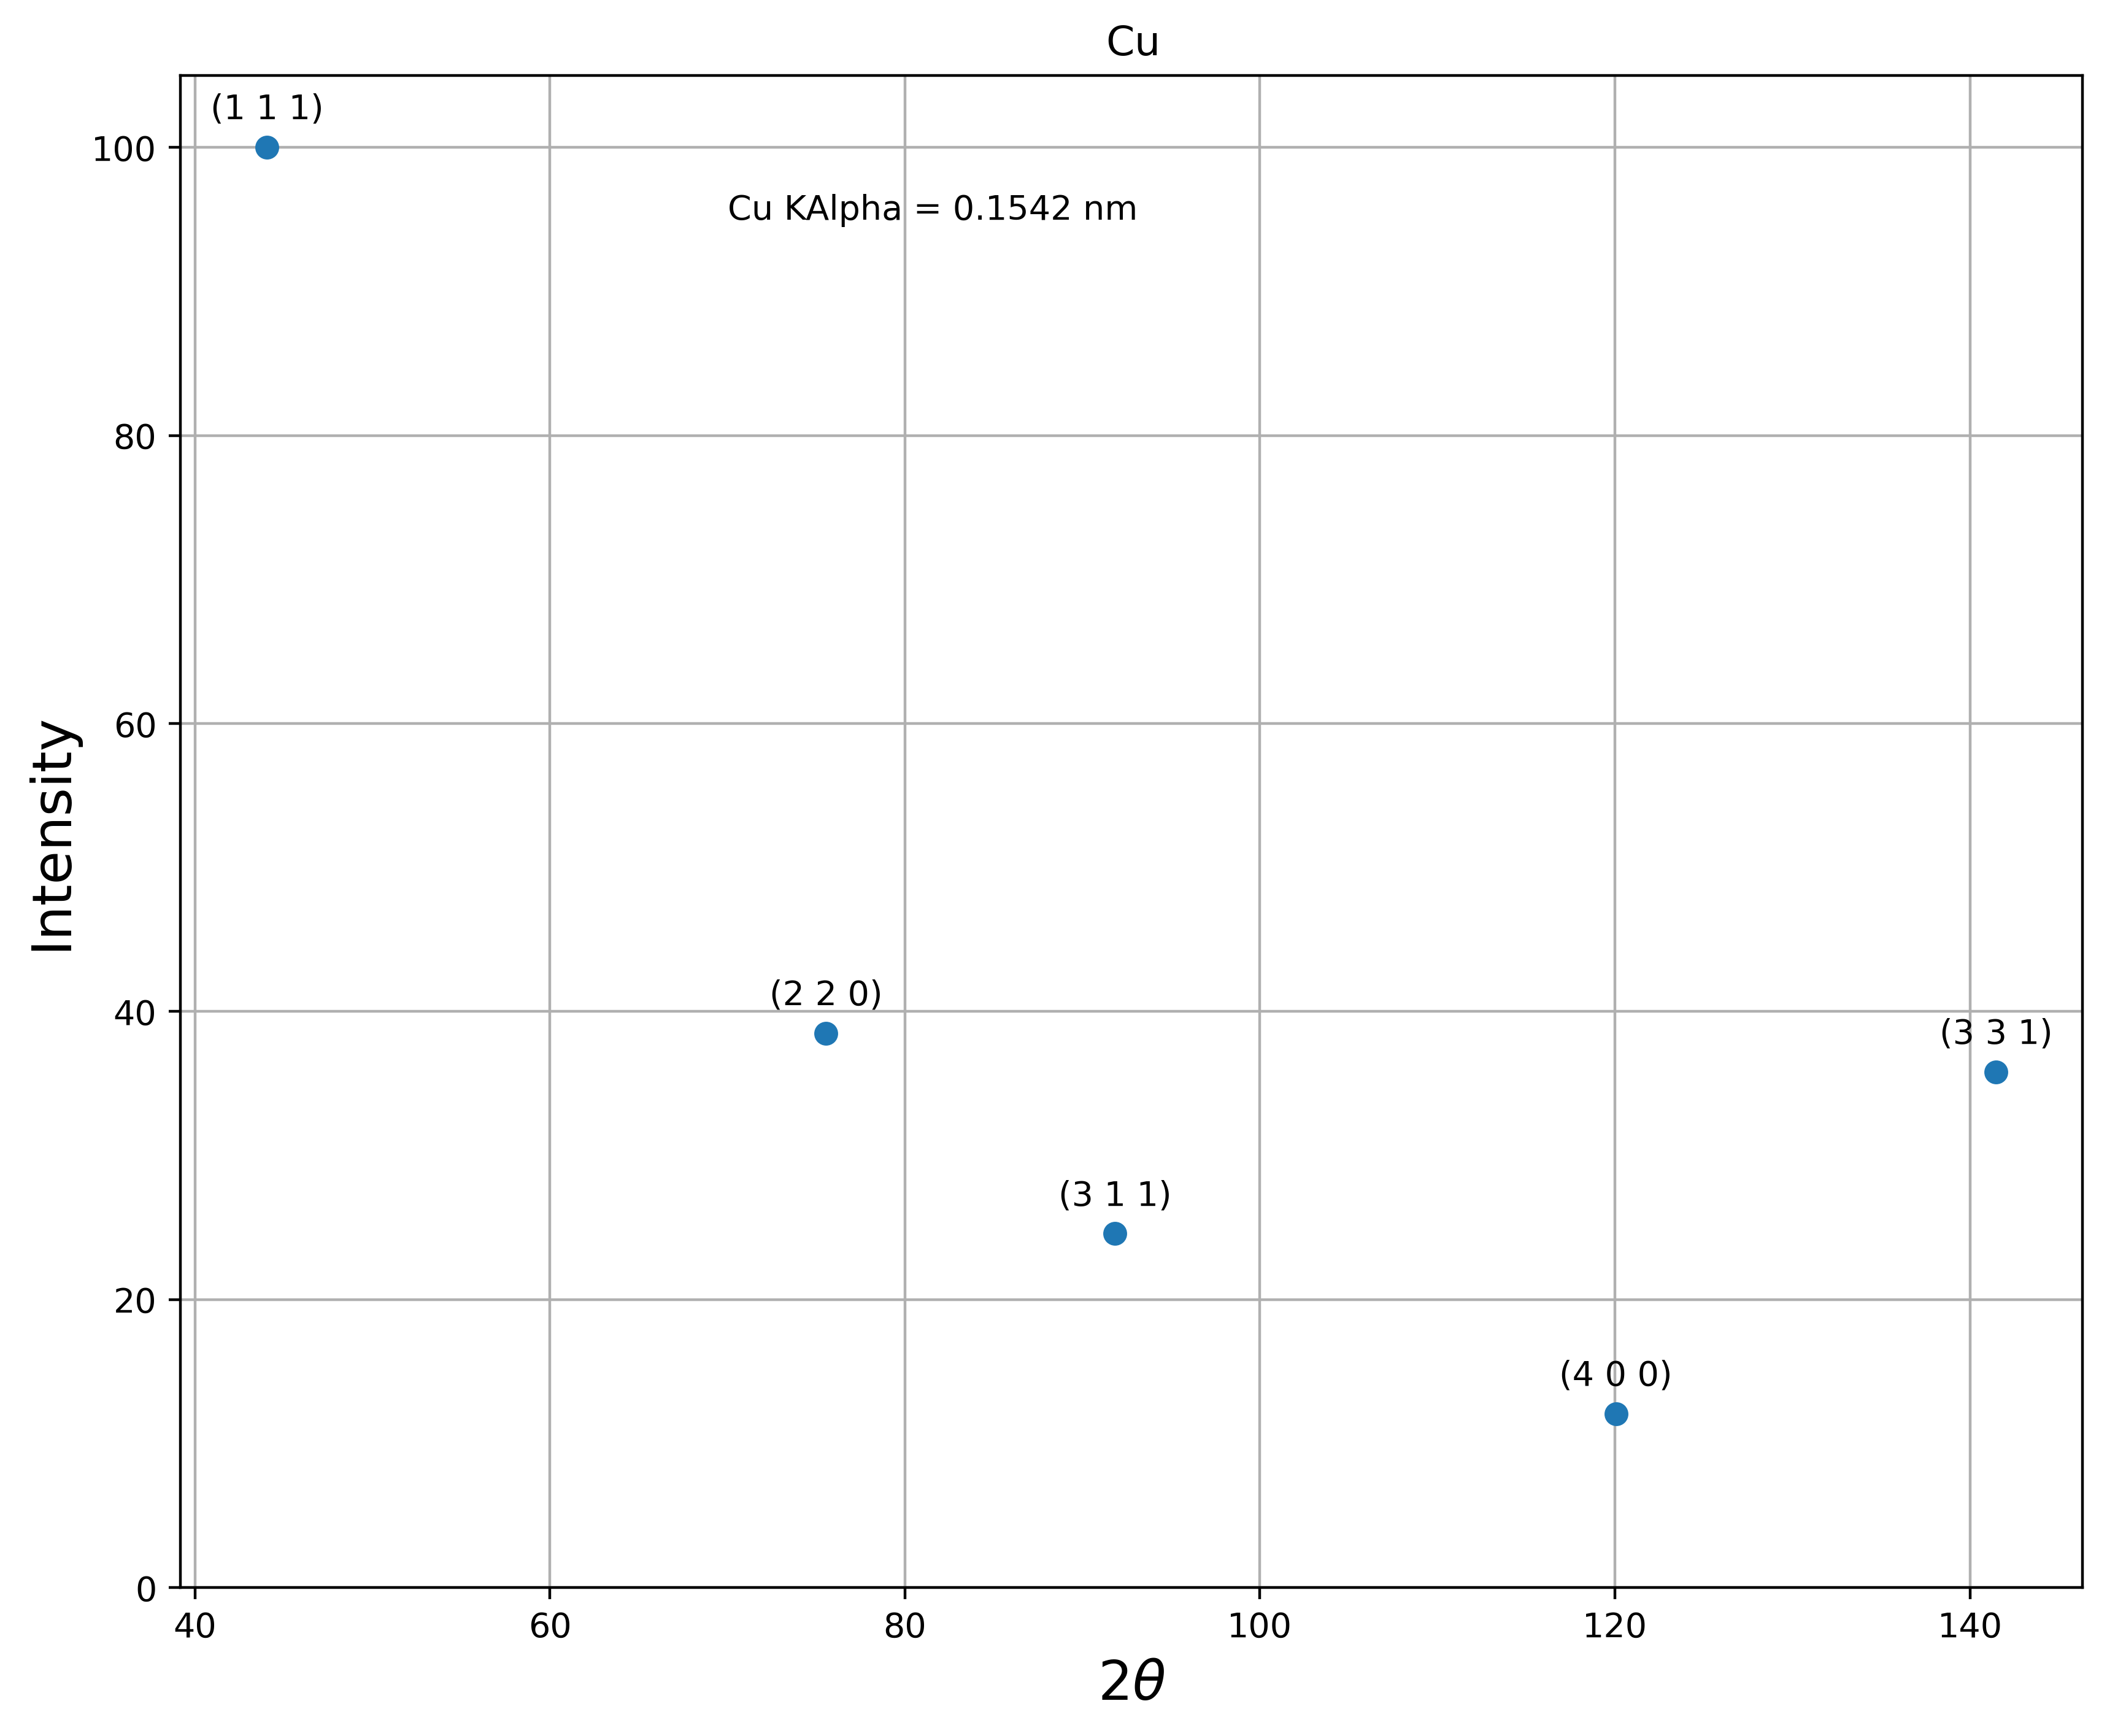

In [14]:
fig = plt.figure(figsize=(10, 8), dpi = 400)
filtered_df = df[df['Intensity_norm'] != 0]
x = filtered_df['2 theta (deg)']
y = filtered_df['Intensity_norm']
plt.plot(x, y, 'o')

# Add text labels above each data point
for index, row in filtered_df.iterrows():
    label = str(row['Miller']).replace('[', '(').replace(']', ')').replace(',', '') 
    x = row['2 theta (deg)']
    y = row['Intensity_norm']
    plt.text(x, y + 0.02 * max(filtered_df['Intensity_norm']), label, ha='center')

# Figure formatting
plt.text(70, 95, "Cu KAlpha = 0.1542 nm")
#plt.xlim(20, 85)
plt.ylim(0, 105)
plt.xlabel("2"r'$\theta$', fontsize = 16)
plt.ylabel('Intensity', fontsize = 16)
plt.title(r'$\mathrm{Cu}$')
plt.grid()
plt.tight_layout